# Allocate Benchmarks

In [1]:
# select measurement file
file_name = "../output/2024-07-02 17-35-51 small.json"

# select style options
grey_fill_between = False

if grey_fill_between:
    fill_between_args = {"color": "grey"}
else:
    fill_between_args = {}


In [2]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [3]:
from util.convert import convert_data
from IPython.core.display import HTML

# filter and convert data
allocate_min = convert_data(raw_data, "allocate_min", ["mean", "min", "max", "options.object_size", "machine_name", "cold_start", "repetitions"])
allocate_max = convert_data(raw_data, "allocate_max", ["mean", "min", "max", "options.object_size", "machine_name", "cold_start", "repetitions"])

display(HTML("<b>MIN Data:</b>"))
display(allocate_min.head())
display(HTML("<b>MAX Data:</b>"))
display(allocate_max.head())

,mean,min,max,options.object_size,machine_name,cold_start,repetitions
0,6914.10,6902,7059,0,esp32c3,0,20
1,4647.65,4303,4806,32,esp32c3,0,20
2,5675.30,5644,6018,64,esp32c3,0,20
3,5732.85,5297,5781,96,esp32c3,0,20
4,8674.25,8644,8997,128,esp32c3,0,20


,mean,min,max,options.object_size,machine_name,cold_start,repetitions
0,22925.80,22902,23201,0,esp32c3,0,20
1,18667.85,18644,18869,32,esp32c3,0,20
2,17663.95,17653,17782,64,esp32c3,0,20
3,16962.40,16943,17079,96,esp32c3,0,20
4,18659.50,18641,18705,128,esp32c3,0,20


In [4]:
from util.convert import get_storage_measurement
from IPython.core.display import HTML

(storage_read, storage_write) = get_storage_measurement(raw_data, allocate_max["options.object_size"].max())

display(HTML("<b>READ Data:</b>"))
display(storage_read.head())
display(HTML("<b>WRITE Data:</b>"))
display(storage_write.head())

,mean,min,max,options.object_size,machine_name,cold_start,repetitions
0,271.10,164,628,0,esp32c3,0,20
1,1686.90,1469,1933,32,esp32c3,0,20
2,3024.00,2977,3575,64,esp32c3,0,20
3,4492.00,4062,4929,96,esp32c3,0,20
4,5994.15,5981,5995,128,esp32c3,0,20


,mean,min,max,options.object_size,machine_name,cold_start,repetitions
0,428.40,244,720,0,esp32c3,0,20
1,1993.35,1961,1996,32,esp32c3,0,20
2,2994.45,2980,2996,64,esp32c3,0,20
3,4959.25,4302,4995,96,esp32c3,0,20
4,5991.05,5932,5995,128,esp32c3,0,20


Text(0.5, 1.0, 'Allocate Latency for "esp32c3"')

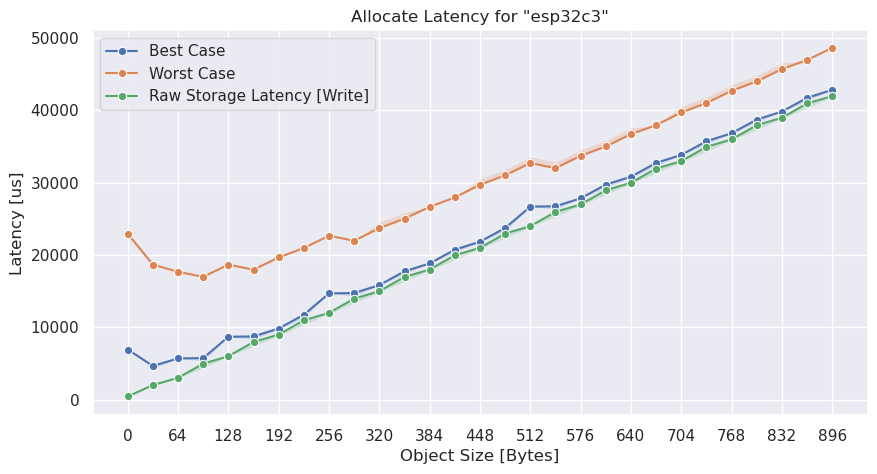

In [5]:
from util.plot import set_grid
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

if len(allocate_min) != 0:
    sns.lineplot(ax=ax, data=allocate_min, x="options.object_size", y="mean", label="Best Case", markers=["o"], marker="o")
    ax.fill_between(allocate_min["options.object_size"], allocate_min["min"], allocate_min["max"], alpha=0.2, **fill_between_args)

if len(allocate_max) != 0:
    sns.lineplot(ax=ax, data=allocate_max, x="options.object_size", y="mean", label="Worst Case", markers=["o"], marker="o")
    ax.fill_between(allocate_max["options.object_size"], allocate_max["min"], allocate_max["max"], alpha=0.2, **fill_between_args)

if len(storage_write) != 0:
    sns.lineplot(ax=ax, data=storage_write, x="options.object_size", y="mean", label="Raw Storage Latency [Write]", markers=["o"], marker="o")
    ax.fill_between(storage_write["options.object_size"], storage_write["min"], storage_write["max"], alpha=0.2, **fill_between_args)

set_grid(64, max(allocate_min["options.object_size"].max(), allocate_max["options.object_size"].max()), ax)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel("Latency [us]")
ax.set_title("Allocate Latency for \"" + allocate_min["machine_name"][0] + "\"")
#plt.axis([200, 300, 10000, 15000])